In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install statsmodels

In [27]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# 가상의 센서 데이터 생성 함수
def generate_sensor_data_for_one_day(date, num_entries):
    timestamps = pd.date_range(start=f"{date} 00:00", end=f"{date} 23:00", freq='H').to_pydatetime().tolist()
    sensor_data = {
        'timestamp': np.random.choice(timestamps, size=num_entries, replace=True),
        'sensor_id': np.random.choice(['sensor_1', 'sensor_2', 'sensor_3'], size=num_entries),
        'event_type': np.random.choice(['motion', 'door_open', 'light_on'], size=num_entries),
        'location': np.random.choice(['living_room', 'bedroom', 'kitchen'], size=num_entries)
    }
    return pd.DataFrame(sensor_data)

# 데이터 생성 (2023년 1월 1일 하루 동안)
date = "2023-01-01"
data = generate_sensor_data_for_one_day(date, 24)

# 타임스탬프 정렬
data = data.sort_values('timestamp').reset_index(drop=True)
print(data)


             timestamp sensor_id event_type     location
0  2023-01-01 00:00:00  sensor_3   light_on      kitchen
1  2023-01-01 00:00:00  sensor_1   light_on      kitchen
2  2023-01-01 03:00:00  sensor_3     motion  living_room
3  2023-01-01 03:00:00  sensor_1   light_on      bedroom
4  2023-01-01 03:00:00  sensor_2  door_open      bedroom
5  2023-01-01 05:00:00  sensor_2  door_open      bedroom
6  2023-01-01 05:00:00  sensor_1   light_on  living_room
7  2023-01-01 06:00:00  sensor_1     motion      bedroom
8  2023-01-01 08:00:00  sensor_3     motion      bedroom
9  2023-01-01 08:00:00  sensor_3   light_on      kitchen
10 2023-01-01 09:00:00  sensor_3     motion      kitchen
11 2023-01-01 09:00:00  sensor_3  door_open  living_room
12 2023-01-01 09:00:00  sensor_1     motion  living_room
13 2023-01-01 12:00:00  sensor_1  door_open      bedroom
14 2023-01-01 12:00:00  sensor_2   light_on      kitchen
15 2023-01-01 12:00:00  sensor_1   light_on      kitchen
16 2023-01-01 13:00:00  sensor_

/var/folders/dg/2hn16bfj6rx7h3ngyfcfwdpw0000gn/T/ipykernel_60704/2465197900.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timestamps = pd.date_range(start=f"{date} 00:00", end=f"{date} 23:00", freq='H').to_pydatetime().tolist()


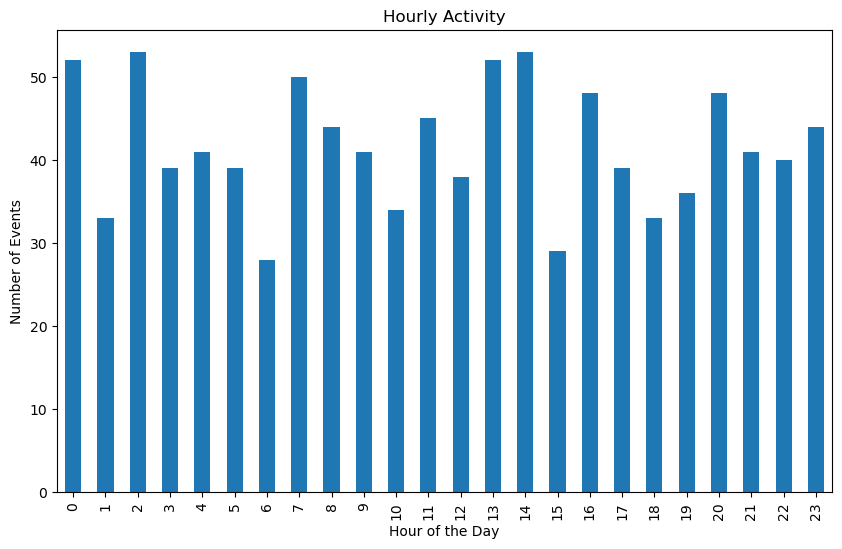

24    40.703081
25    41.808987
26    41.438026
27    41.562460
28    41.520720
29    41.534721
30    41.530025
31    41.531600
32    41.531072
33    41.531249
34    41.531190
35    41.531210
36    41.531203
37    41.531205
38    41.531204
39    41.531205
40    41.531204
41    41.531205
42    41.531204
43    41.531204
44    41.531204
45    41.531204
46    41.531204
47    41.531204
Name: predicted_mean, dtype: float64


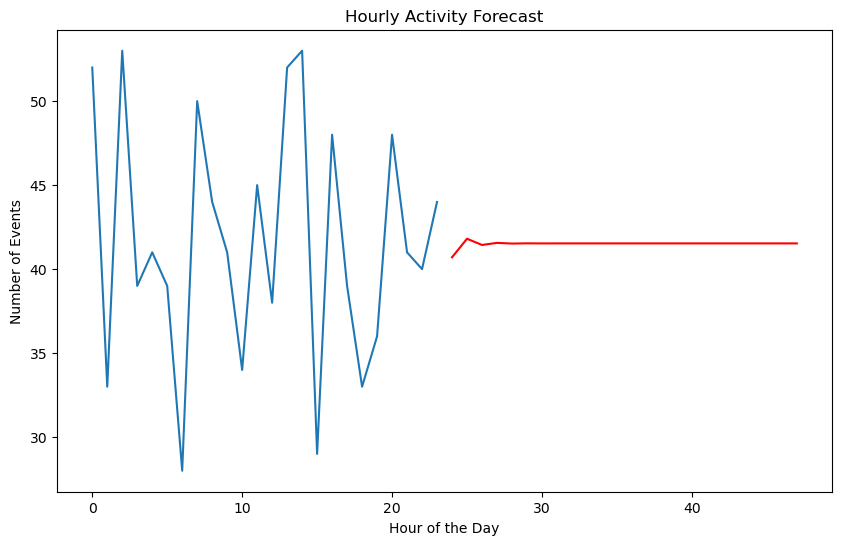

In [28]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 시간대별 이벤트 발생 빈도를 시각화
hourly_activity.plot(kind='bar', figsize=(10, 6))
plt.title('Hourly Activity')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Events')
plt.show()

# 시계열 모델을 이용한 패턴 예측 (ARIMA 모델)
model = ARIMA(hourly_activity, order=(1, 1, 1))
model_fit = model.fit()

# 예측 결과
forecast = model_fit.forecast(steps=24)
print(forecast)

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(hourly_activity.index, hourly_activity, label='Observed')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('Hourly Activity Forecast')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Events')
#plt.legend()
plt.show()


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 실제 값 (테스트 데이터의 일부라고 가정)
actual = hourly_activity[-24:]  # 최근 24시간 데이터를 실제 값으로 사용

# 예측 값 (ARIMA 모델의 예측 결과)
forecast = model_fit.forecast(steps=24)

# MAE 계산
mae = mean_absolute_error(actual, forecast)
print(f'Mean Absolute Error (MAE): {mae}')

# MSE 계산
mse = mean_squared_error(actual, forecast)
print(f'Mean Squared Error (MSE): {mse}')

# RMSE 계산
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# MAPE 계산
mape = np.mean(np.abs((actual - forecast) / actual)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')


Mean Absolute Error (MAE): 6.056115456357986
Mean Squared Error (MSE): 53.95370870543828
Root Mean Squared Error (RMSE): 7.345318829393199
Mean Absolute Percentage Error (MAPE): nan%


In [21]:
# ARIMA 모델 예측
forecast = model_fit.forecast(steps=24)

# 예측 결과 출력
print("Forecasted Values:")
print(forecast)


Forecasted Values:
24    40.703081
25    41.808987
26    41.438026
27    41.562460
28    41.520720
29    41.534721
30    41.530025
31    41.531600
32    41.531072
33    41.531249
34    41.531190
35    41.531210
36    41.531203
37    41.531205
38    41.531204
39    41.531205
40    41.531204
41    41.531205
42    41.531204
43    41.531204
44    41.531204
45    41.531204
46    41.531204
47    41.531204
Name: predicted_mean, dtype: float64


In [22]:
import pandas as pd

# 예측 결과를 DataFrame으로 변환
forecast_df = pd.DataFrame({
    'Hour': range(len(forecast)),
    'Forecasted Events': forecast
})

# 예측 결과 출력
print(forecast_df)


    Hour  Forecasted Events
24     0          40.703081
25     1          41.808987
26     2          41.438026
27     3          41.562460
28     4          41.520720
29     5          41.534721
30     6          41.530025
31     7          41.531600
32     8          41.531072
33     9          41.531249
34    10          41.531190
35    11          41.531210
36    12          41.531203
37    13          41.531205
38    14          41.531204
39    15          41.531205
40    16          41.531204
41    17          41.531205
42    18          41.531204
43    19          41.531204
44    20          41.531204
45    21          41.531204
46    22          41.531204
47    23          41.531204


In [23]:
# 예측 결과를 CSV 파일로 저장
forecast_df.to_csv('forecasted_events.csv', index=False)
print("Forecast results saved to 'forecasted_events.csv'")


Forecast results saved to 'forecasted_events.csv'
